In [216]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
from scipy.ndimage.filters import uniform_filter1d
import librosa
import librosa.display

%matplotlib inline

In [58]:
from google.colab import files
upload=files.upload()

KeyboardInterrupt: ignored

In [217]:
Fs, data = read('test.wav')

# data = data[:,0]
print(data)
print("Sampling Frequency is", Fs)

[2850 5330 6395 ... 8565 7787 7191]
Sampling Frequency is 16000


In [218]:
Audio(data, rate=Fs)

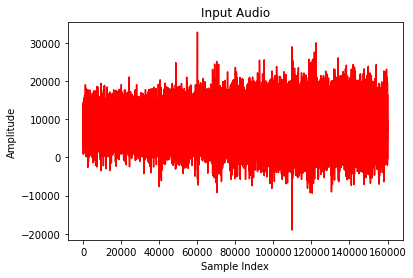

In [219]:
plt.figure()
plt.plot(data,'r')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Input Audio')
plt.show()

$y[t] = \frac{1}{N}\sum_{n=0}^{N-1}{x[t+n]}$ 

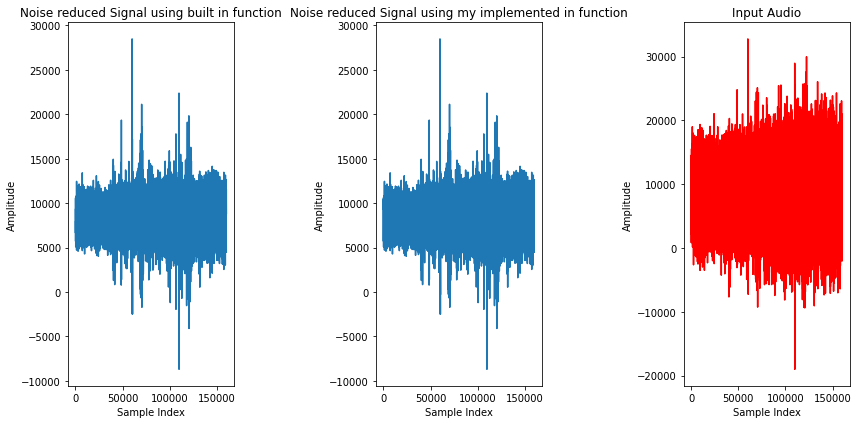

In [224]:
plt.figure(figsize = (12, 6))

# print(len(data))

N=len(data)//7000
# print(N)

a2 = []


def mva(x, N):
  #  x == an array of data. N == number of samples per average
  cumsum = np.cumsum(np.insert(x, 0, 0)) 
  return (cumsum[N:] - cumsum[:-N]) / float(N)
  
a = mva(data,N)
# a2.append(a)
# print(data)
# print(a2)
# print(a)

# print(type(a))
# print(type(a2))
# plt.plot(a)
# """ [  7.83666667  33.69666667  50.56333333  41.84333333  27.01666667
#    1.59666667 -24.26333333 -57.11      ]	"""

y = uniform_filter1d(data, size=N)
# print(len(y))
# print(len(a))
plt.subplot(131)
plt.plot(y)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Noise reduced Signal using built in function')

plt.subplot(132)
plt.plot(a)
# plt.plot(data, 'r')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Noise reduced Signal using my implemented in function')

plt.subplot(133)
plt.plot(data, 'r')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Input Audio')

# print('Is
plt.tight_layout()
# print('Is my implemented IDFT close to numpy ifft?',np.allclose(a - y,1e-12))

# for i in range(len(data)):
#   y[i] = 

In [202]:
Audio(a, rate=Fs)

In [211]:
Audio(data, rate=Fs)

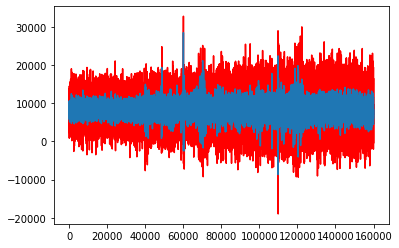

In [213]:
plt.plot(data, 'r')
plt.plot(a)
# plt.legend("Input Data", "Noise reduced data")
plt.show()